In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.axes as ax
from IPython.display import clear_output

In [6]:
df = pd.read_csv("data_for_lr.csv")
df.head()

# Drop null values
df = df.dropna()
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


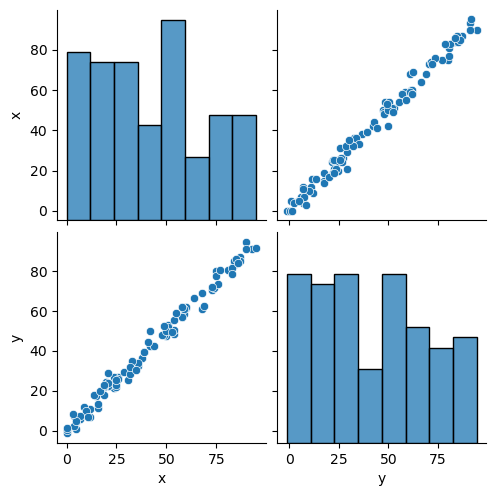

In [7]:
sns.pairplot(
    df[:100]
)

# Train-Test Split

In [8]:
# skipping cross-validation part for now for convenience
N = len(df)
training_data_len = int (N*0.8)
x_train, y_train = np.array(df['x'][0:training_data_len]).reshape(training_data_len, 1), np.array(df['y'][0:training_data_len]).reshape(
    training_data_len, 1
)
x_test, y_test = np.array(df['x'][training_data_len:N]).reshape(N - training_data_len, 1), np.array(
    df['y'][training_data_len:N]).reshape(N - training_data_len, 1)

In [9]:
N

699

## linear regression

here's the mathematical derivation I did on paper before implementing it in python
![WhatsApp Image 2024-02-13 at 15.19.03_5a06bc6f.jpg](<attachment:WhatsApp Image 2024-02-13 at 15.19.03_5a06bc6f.jpg>)
![WhatsApp Image 2024-02-13 at 15.19.03_4d0bba2f.jpg](<attachment:WhatsApp Image 2024-02-13 at 15.19.03_4d0bba2f.jpg>)
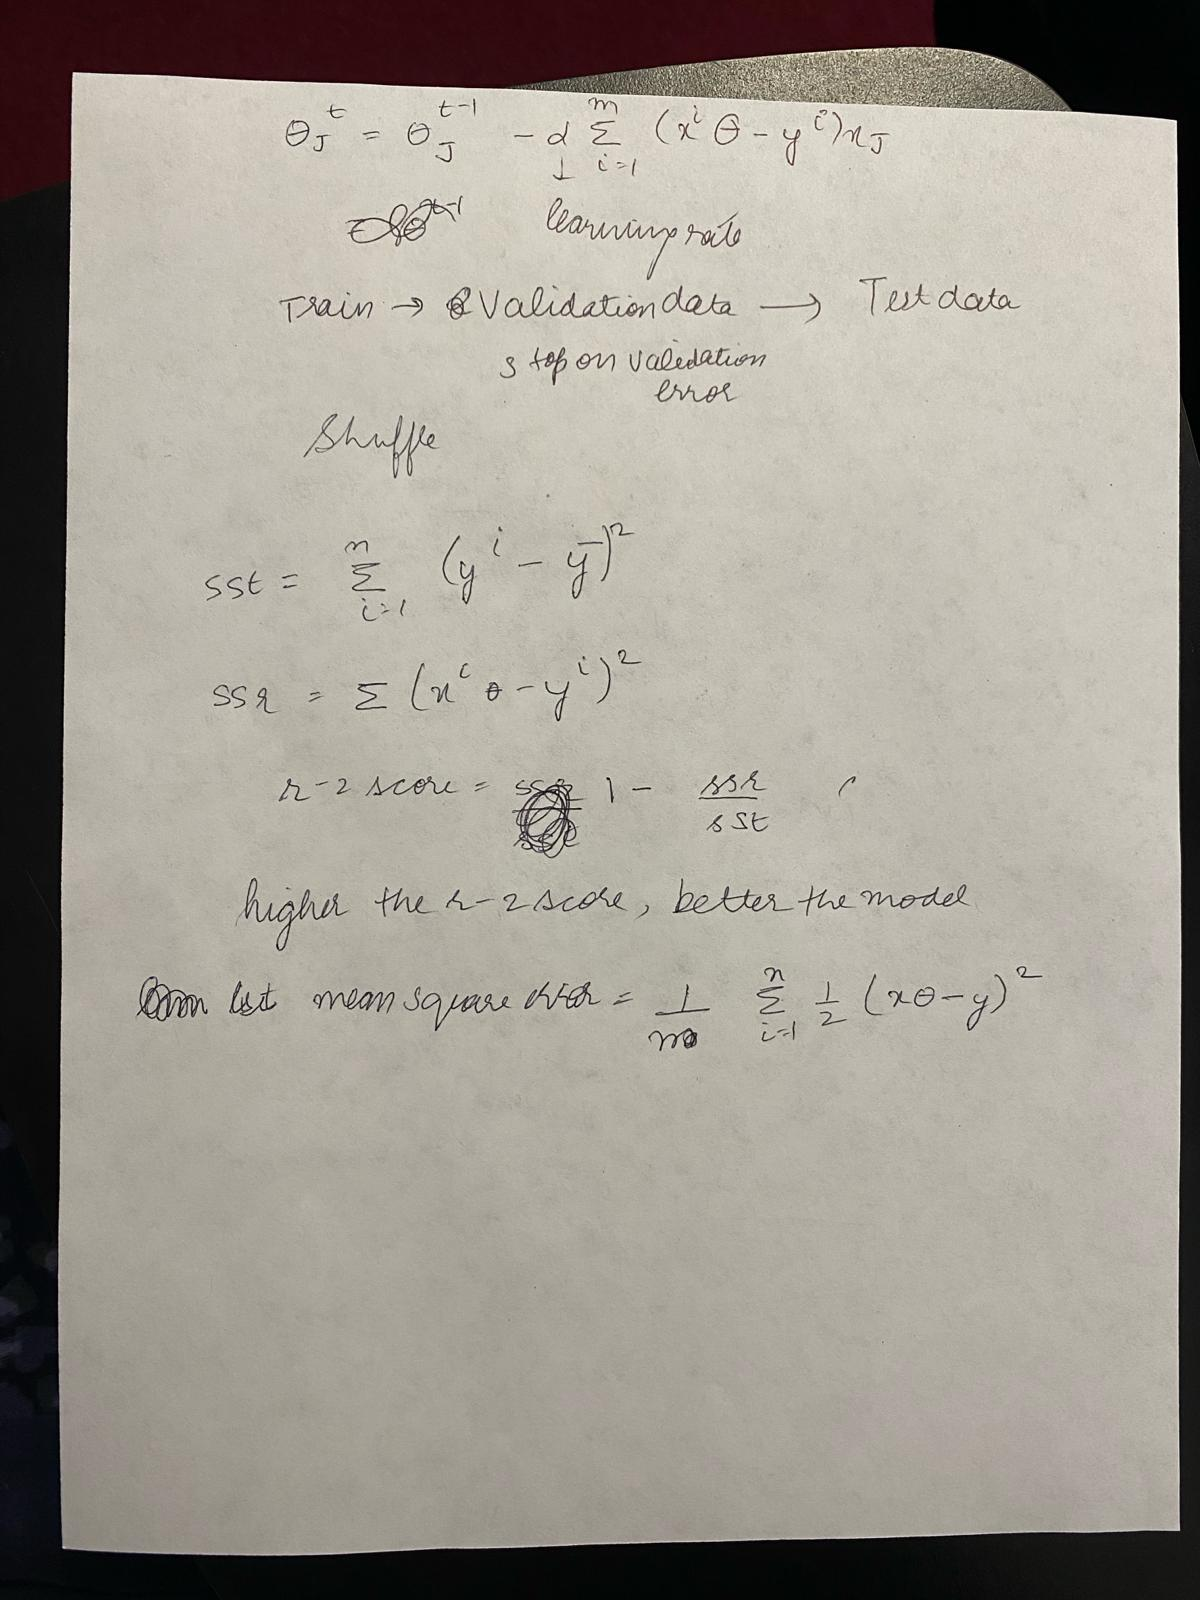
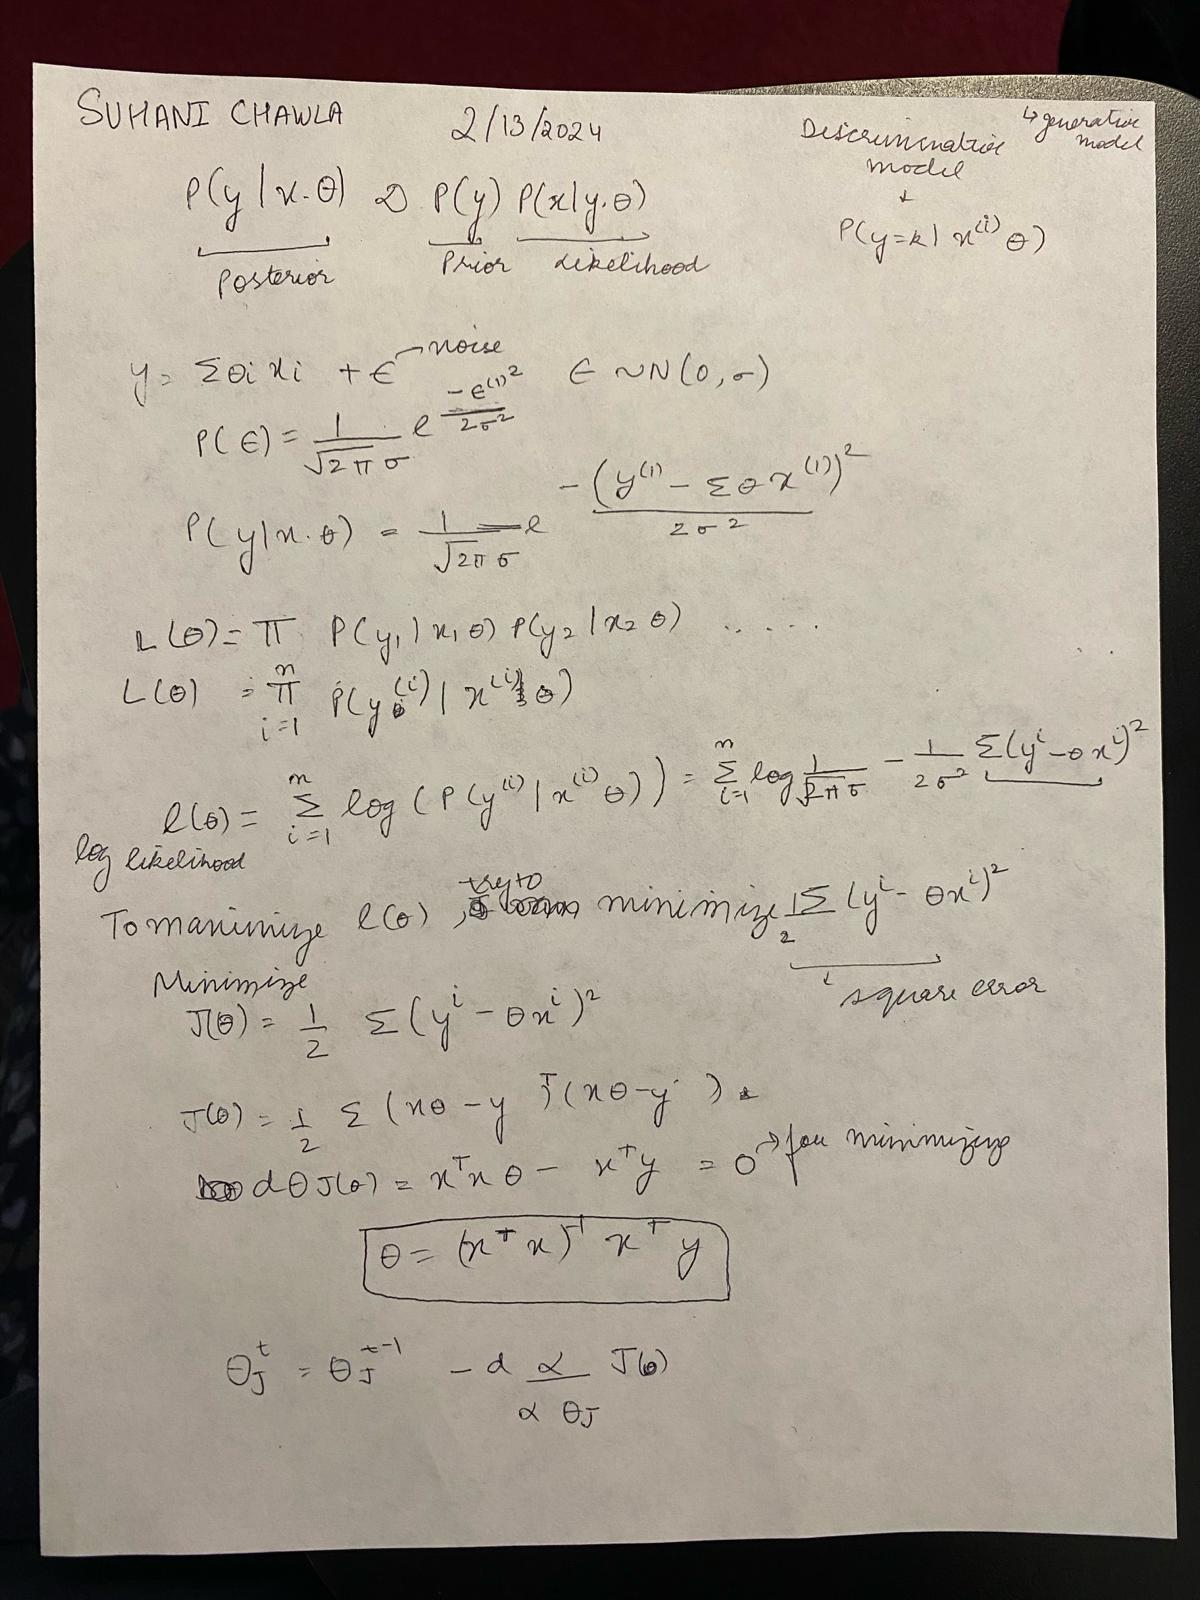

In [10]:
# the same calculation in python 

class LinearRegression:
    def __init__(self):
        self.Q0 = np.random.uniform(0, 1) * -1  # Intercept
        self.Q1 = np.random.uniform(0, 1) * -1  # Coefficient of X
        self.losses = []  # Storing the loss of each iteration
        self.r2s = []

    def forward_propogation(self, training_input):
        predicted_values = np.multiply(self.Q1, training_input) + self.Q0  # y = mx + c
        return predicted_values

    def cost(self, predictions, training_output):
        lmse = np.mean((predictions - training_output) ** 2)  # Calculating the cost
        ssr = np.sum((predictions - training_output)**2)
        sst = np.sum((training_output - np.mean(training_output))**2)
        r2_score = 1 - (ssr/sst)
        return lmse, r2_score

    def finding_derivatives(self, cost, predictions, training_input, training_output):
        diff = predictions - training_output
        dQ0 = np.mean(diff)  # d(J(Q0, Q1))/d(Q0)
        dQ1 = np.mean(np.multiply(diff, training_input))  # d(J(Q0, Q1))/d(Q1)
        return dQ0, dQ1

    def train(self, x_train, y_train, lr, itrs):
        for i in range(itrs):
            # Finding the predicted values (Using the linear equation y=mx+c)
            predicted_values = self.forward_propogation(x_train)

            # Calculating the Loss
            loss, r2 = self.cost(predicted_values, y_train)
            self.losses.append(loss)
            self.r2s.append(r2)

            # Back Propagation (Finding Derivatives of Weights)
            dQ0, dQ1 = self.finding_derivatives(
                loss, predicted_values, x_train, y_train
            )

            # Updating the Weights
            self.Q0 = self.Q0 - lr * (dQ0)
            self.Q1 = self.Q1 - lr * (dQ1)

            # It will dynamically update the plot of the straight line
            line = self.Q0 + x_train * self.Q1
            clear_output(wait=True)
            plt.plot(x_train, y_train, "+", label="Actual values")
            plt.plot(x_train, line, label="Linear Equation")
            plt.xlabel("Train-X")
            plt.ylabel("Train-Y")
            plt.legend()
            plt.show()
        return (
            self.Q0,
            self.Q1,
            self.losses,
            self.r2s
        )  # Returning the final model weights and the losses

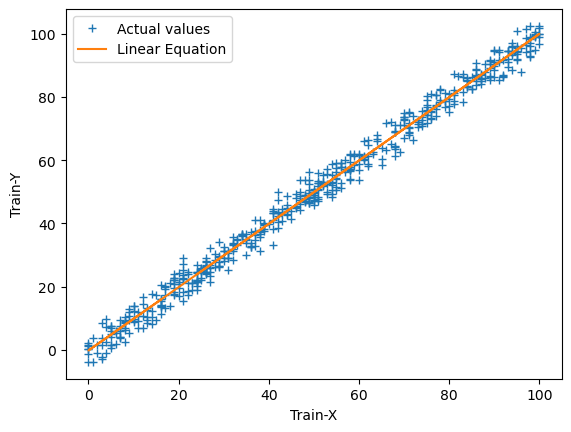

In [11]:
lr = 0.0001  # Learning Rate
itrs = 30  # No. of iterations
model = LinearRegression()
Q0, Q1, losses,r2s = model.train(x_train, y_train, lr, itrs)

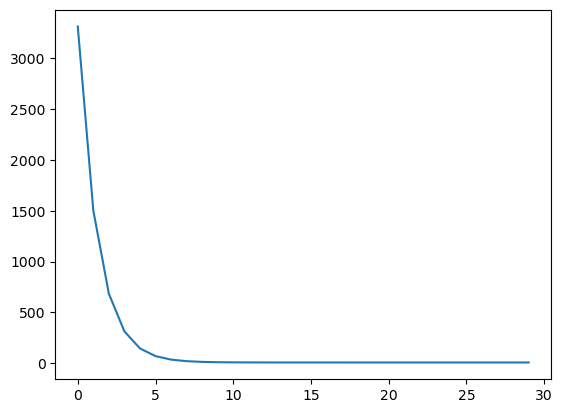

from this graph we can see that after 10 iterations the loss is stabilized, therefore we could stop roughly after 10 iterations


In [12]:
plt.plot(losses)
plt.show()
print("from this graph we can see that after 10 iterations the loss is stabilized, therefore we could stop roughly after 10 iterations")

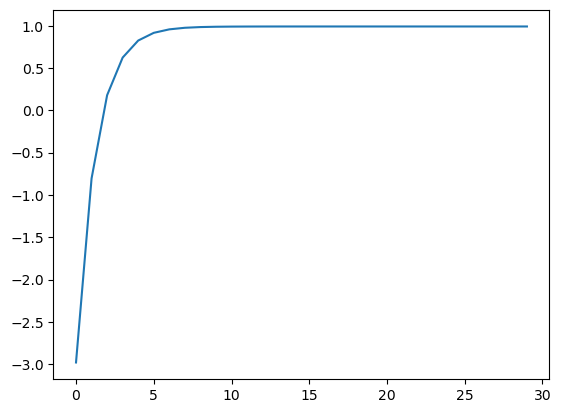

In [13]:
plt.plot(r2s)
plt.show()

## performance on test data

In [14]:
y_pred = model.forward_propogation(x_test)

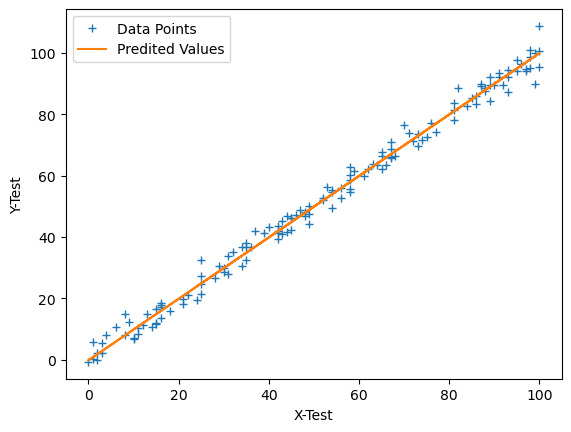

In [15]:
plt.plot(x_test, y_test, "+", label="Data Points")
plt.plot(x_test, y_pred, label="Predited Values")
plt.xlabel("X-Test")
plt.ylabel("Y-Test")
plt.legend()
plt.show()

### 2nd way 

the manual implementation was for my own understanding, now using sklearn LinearRegression and train_test_split

In [16]:
df2 = pd.read_csv("data_for_lr.csv")
df2.head()

# Drop null values
df2 = df2.dropna()

Y = df2['y']
X = df2.drop("y", axis=1)
len(X)==len(Y)

True

In [17]:
X.head()

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0


In [18]:
Y.head()

0    21.549452
1    47.464463
2    17.218656
3    36.586398
4    87.288984
Name: y, dtype: float64

In [21]:
### do train test split using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [24]:
### fit a regression model on train data
### predict values of on test data
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_test, Y_test))


0.9900697525613219


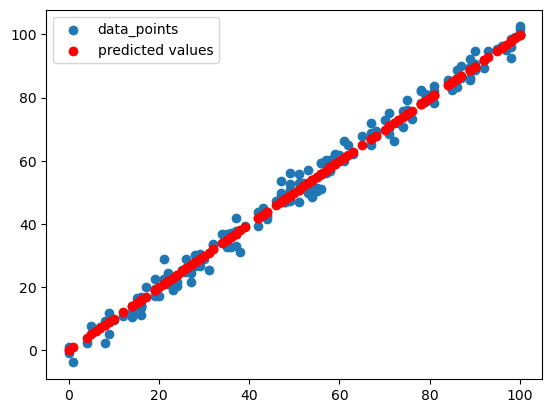

In [42]:
# graphing results
import matplotlib.pyplot as plt
y_pred = regr.predict(X_test)
plt.scatter(X_test, Y_test, label = 'data_points')
plt.scatter(X_test, y_pred, color = 'r', label = 'predicted values')
plt.legend()
plt.show()